### import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df = pd.read_csv("final_dataset.csv")

In [17]:
df.head(5)

,Date,HomeTeam,AwayTeam,Day_Eve,Day Type,Hol Type,Capacity,Average Travelling Fans,Cheapest Season T,Home League Position,Away League Position,Form Home,Form Away,Distance,Temperature,Lowest Home Ticket Price,Lowest Away Ticket Price,Attendance,Highest Home Ticket Price
0,05/08/2016,Fulham,Newcastle,E,1,0,25700,3140,254.0,0,0,0,0,249.0,20.2,25.0,24.0,23922,45.0
1,06/08/2016,Birmingham,Cardiff,D,0,0,30016,775,230.0,0,0,0,0,89.0,18.8,15.0,22.0,19833,40.0
2,06/08/2016,Blackburn,Norwich City,D,0,0,31367,1661,279.0,0,0,0,0,175.0,17.9,18.0,20.0,12641,35.0
3,06/08/2016,Bristol City,Wigan Athletic,D,0,0,21497,1284,299.0,0,0,0,0,145.0,19.1,25.0,20.0,17635,41.0
4,06/08/2016,Derby,Brighton & Hove Albion,D,0,0,33597,1611,319.0,0,0,0,0,154.0,19.3,17.6,25.0,28749,33.0


### convert categorical data using sklearn

In [18]:
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam'] = le.fit_transform(df['AwayTeam'])
df['Day_Eve'] = le.fit_transform(df['Day_Eve'])
df.head(5)

,Date,HomeTeam,AwayTeam,Day_Eve,Day Type,Hol Type,Capacity,Average Travelling Fans,Cheapest Season T,Home League Position,Away League Position,Form Home,Form Away,Distance,Temperature,Lowest Home Ticket Price,Lowest Away Ticket Price,Attendance,Highest Home Ticket Price
0,05/08/2016,19,26,1,1,0,25700,3140,254.0,0,0,0,0,249.0,20.2,25.0,24.0,23922,45.0
1,06/08/2016,3,13,0,0,0,30016,775,230.0,0,0,0,0,89.0,18.8,15.0,22.0,19833,40.0
2,06/08/2016,4,28,0,0,0,31367,1661,279.0,0,0,0,0,175.0,17.9,18.0,20.0,12641,35.0
3,06/08/2016,9,46,0,0,0,21497,1284,299.0,0,0,0,0,145.0,19.1,25.0,20.0,17635,41.0
4,06/08/2016,17,8,0,0,0,33597,1611,319.0,0,0,0,0,154.0,19.3,17.6,25.0,28749,33.0


### split out numeric columns in dataframe, from the non-numeric fields

In [19]:
numeric_cols = list(df.select_dtypes(include=['int64','float64']))
nonnumeric_cols = list(df.select_dtypes(include=['object']))

In [20]:
df_non = df[nonnumeric_cols]
df_non.head(5)

,Date
0,05/08/2016
1,06/08/2016
2,06/08/2016
3,06/08/2016
4,06/08/2016


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d5e19e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e6b5cc0>]], dtype=object)

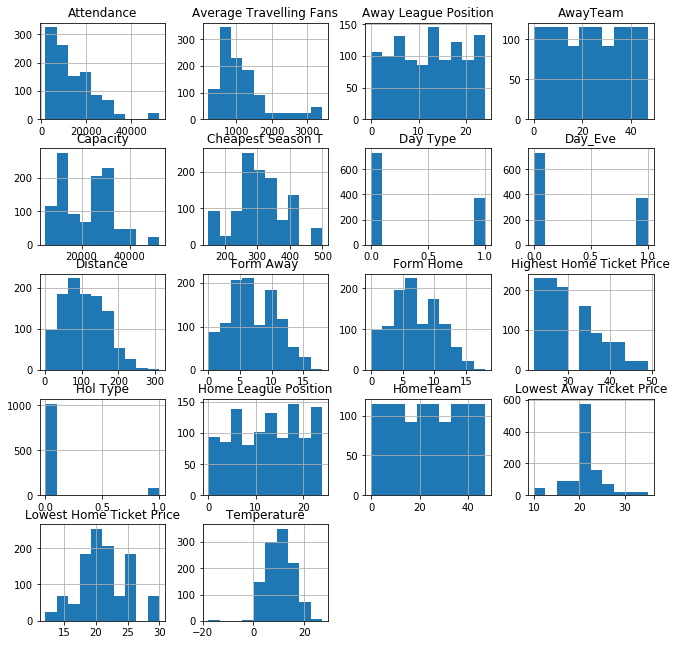

In [21]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

### normalise (using minmax method)

In [22]:
min_max=MinMaxScaler()
# Scaling down the variables from df dataframe
df_minmax=min_max.fit_transform(df[numeric_cols])
# df_minmax = pd.DataFrame(df_minmax)

### populate dataframe (df_new) with normalised values

In [23]:
df_new = pd.DataFrame(columns=numeric_cols)
for rows in range(0,len(df_minmax)):
    df_new.loc[rows] = df_minmax[rows]
df_new

,HomeTeam,AwayTeam,Day_Eve,Day Type,Hol Type,Capacity,Average Travelling Fans,Cheapest Season T,Home League Position,Away League Position,Form Home,Form Away,Distance,Temperature,Lowest Home Ticket Price,Lowest Away Ticket Price,Attendance,Highest Home Ticket Price
0,0.404255,0.553191,1.0,1.0,0.0,0.438449,0.914767,0.299572,0.000000,0.000000,0.000000,0.000000,0.799353,0.848214,0.722222,0.560,0.436858,0.851852
1,0.063830,0.276596,0.0,0.0,0.0,0.529209,0.176397,0.231098,0.000000,0.000000,0.000000,0.000000,0.281553,0.816964,0.166667,0.480,0.355717,0.666667
2,0.085106,0.595745,0.0,0.0,0.0,0.557619,0.453013,0.370899,0.000000,0.000000,0.000000,0.000000,0.559871,0.796875,0.333333,0.400,0.213002,0.481481
3,0.191489,0.978723,0.0,0.0,0.0,0.350065,0.335311,0.427960,0.000000,0.000000,0.000000,0.000000,0.462783,0.823661,0.722222,0.400,0.312101,0.703704
4,0.361702,0.170213,0.0,0.0,0.0,0.604513,0.437402,0.485021,0.000000,0.000000,0.000000,0.000000,0.491909,0.828125,0.311111,0.600,0.532643,0.407407
5,0.446809,0.148936,0.0,0.0,0.0,0.413214,0.266001,0.085592,0.000000,0.416667,0.000000,0.000000,0.517799,0.819196,0.166667,0.400,0.328849,0.296296
6,0.468085,0.042553,0.0,0.0,0.0,0.535412,0.301904,0.764622,0.000000,0.000000,0.000000,0.000000,0.482201,0.823661,1.000000,0.520,0.306842,0.666667
7,0.617021,0.234043,0.0,0.0,0.0,0.541532,0.119888,0.627675,0.000000,0.000000,0.000000,0.000000,0.064725,0.870536,0.333333,0.400,0.418800,0.481481
8,0.765957,0.723404,0.0,0.0,0.0,0.406086,0.383078,0.502140,0.000000,0.000000,0.000000,0.000000,0.569579,0.854911,0.444444,0.560,0.274973,0.481481
9,0.808511,1.000000,0.0,0.0,0.0,0.150797,0.382454,0.587732,0.000000,0.000000,0.000000,0.000000,0.210356,0.879464,0.722222,0.800,0.186213,0.185185


In [24]:
df_final = pd.concat([df_new,df_non], axis=1)
df_final.head(5)

,HomeTeam,AwayTeam,Day_Eve,Day Type,Hol Type,Capacity,Average Travelling Fans,Cheapest Season T,Home League Position,Away League Position,Form Home,Form Away,Distance,Temperature,Lowest Home Ticket Price,Lowest Away Ticket Price,Attendance,Highest Home Ticket Price,Date
0,0.404255,0.553191,1.0,1.0,0.0,0.438449,0.914767,0.299572,0.0,0.0,0.0,0.0,0.799353,0.848214,0.722222,0.56,0.436858,0.851852,05/08/2016
1,0.063830,0.276596,0.0,0.0,0.0,0.529209,0.176397,0.231098,0.0,0.0,0.0,0.0,0.281553,0.816964,0.166667,0.48,0.355717,0.666667,06/08/2016
2,0.085106,0.595745,0.0,0.0,0.0,0.557619,0.453013,0.370899,0.0,0.0,0.0,0.0,0.559871,0.796875,0.333333,0.40,0.213002,0.481481,06/08/2016
3,0.191489,0.978723,0.0,0.0,0.0,0.350065,0.335311,0.427960,0.0,0.0,0.0,0.0,0.462783,0.823661,0.722222,0.40,0.312101,0.703704,06/08/2016
4,0.361702,0.170213,0.0,0.0,0.0,0.604513,0.437402,0.485021,0.0,0.0,0.0,0.0,0.491909,0.828125,0.311111,0.60,0.532643,0.407407,06/08/2016


In [25]:
df_final.to_csv("normalised_data_minmaxscaler.csv")